In [1]:
%tensorflow_version 2.x

In [2]:
from tensorflow.keras.datasets.mnist import load_data
mnist = load_data()
mnist # 是一個 tuple, (x_train, y_train), (x_test, y_test)

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
# x_train 為訓練資料的資料, y_train 為訓練資料的答案
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
# 查看資料有幾筆, 必做的動作
print(x_train.shape) # 共有 6萬張 圖, 每張圖 28 x 28 大小
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
# 取一筆資料查看
import pandas as pd
pd.DataFrame(x_train[12])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,12,99,91,142,155,246,182,155,155,155,155,131,52,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,138,254,254,254,254,254,254,254,254,254,254,254,252,210,122,33,0,0,0,0,0,0,0,0,0
7,0,0,0,220,254,254,254,235,189,189,189,189,150,189,205,254,254,254,75,0,0,0,0,0,0,0,0,0
8,0,0,0,35,74,35,35,25,0,0,0,0,0,0,13,224,254,254,153,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,254,254,247,53,0,0,0,0,0,0,0,0,0


這個是: 6


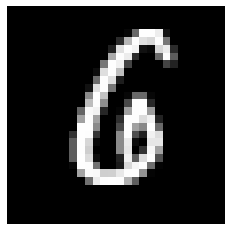

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
p = random.randint(0, 59999)
plt.axis("off")
plt.imshow(x_train[p], cmap="gray")
print("這個是:", y_train[p])

In [7]:
# 建立神經元網路
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(256, activation="relu", input_dim=784))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


#### Dense 為全連接網路, 表示每一個神經元都有連接, 28 x 28 x 64 + 64 = 50240 (第一層的參數)
#### 第二層參數, 64 x 10 + 10 = 650
#### 中間層激活函數用 relu,避免梯度消失, 最後一層積活函數用 softmax 是因為要分類成10類

In [8]:
# 建立好訓練方式, 
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [9]:
# tensorflow 需求, 將資料處理成 0~1的向量
x_train_norm = x_train.reshape(60000, 784) / 255
x_test_norm = x_test.reshape(10000, 784) / 255
x_train_norm[10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
# 答案處理成 one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("原本的:", y_test[15])
print("處理過的:", y_test_cat[15])

原本的: 5
處理過的: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
# 訓練MLP, batch_size=200 每看 200張圖片調整一次loss, epochs=20 整批資料總共看20次
model.fit(x_train_norm, y_train_cat,
          batch_size=200, epochs=18,
          verbose=1, validation_split=0.1)

Epoch 1/18
270/270 [==============================] - 2s 6ms/step - loss: 0.3695 - accuracy: 0.8966 - val_loss: 0.1570 - val_accuracy: 0.9567
Epoch 2/18
270/270 [==============================] - 1s 5ms/step - loss: 0.1617 - accuracy: 0.9537 - val_loss: 0.1175 - val_accuracy: 0.9667
Epoch 3/18
270/270 [==============================] - 1s 5ms/step - loss: 0.1132 - accuracy: 0.9671 - val_loss: 0.0936 - val_accuracy: 0.9743
Epoch 4/18
270/270 [==============================] - 1s 6ms/step - loss: 0.0856 - accuracy: 0.9761 - val_loss: 0.0839 - val_accuracy: 0.9760
Epoch 5/18
270/270 [==============================] - 1s 5ms/step - loss: 0.0677 - accuracy: 0.9806 - val_loss: 0.0790 - val_accuracy: 0.9782
Epoch 6/18
270/270 [==============================] - 1s 6ms/step - loss: 0.0548 - accuracy: 0.9845 - val_loss: 0.0736 - val_accuracy: 0.9785
Epoch 7/18
270/270 [==============================] - 1s 6ms/step - loss: 0.0445 - accuracy: 0.9879 - val_loss: 0.0693 - val_accuracy: 0.9797
Epoch 

In [12]:
# 用 MLP 沒看過的資料測試, val_loss:0.067 準確率約 0.98 表示256層神經元表現好於64層
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 2ms/step - loss: 0.0671 - accuracy: 0.9806


[0.06712053716182709, 0.9805999994277954]

In [13]:
pre = model.predict_classes(x_test_norm)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [14]:
# 畫出混淆矩陣了解預測情況
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test, pre)
p = ["{}(預測)".format(i) for i in range(0, 10)]
r = ["{}(真實)".format(i) for i in range(0, 10)]
pd.DataFrame(con, columns=p, index=r)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),974,0,1,1,0,1,1,1,1,0
1(真實),0,1123,2,2,0,1,2,1,4,0
2(真實),4,1,1012,1,1,0,2,5,5,1
3(真實),1,0,5,989,0,3,0,5,4,3
4(真實),2,0,0,1,967,0,5,1,0,6
5(真實),2,0,0,7,0,873,4,0,5,1
6(真實),4,3,2,1,2,6,940,0,0,0
7(真實),1,4,8,3,0,0,0,1005,2,5
8(真實),3,1,2,3,4,5,1,3,949,3
9(真實),2,2,0,4,13,6,0,3,5,974


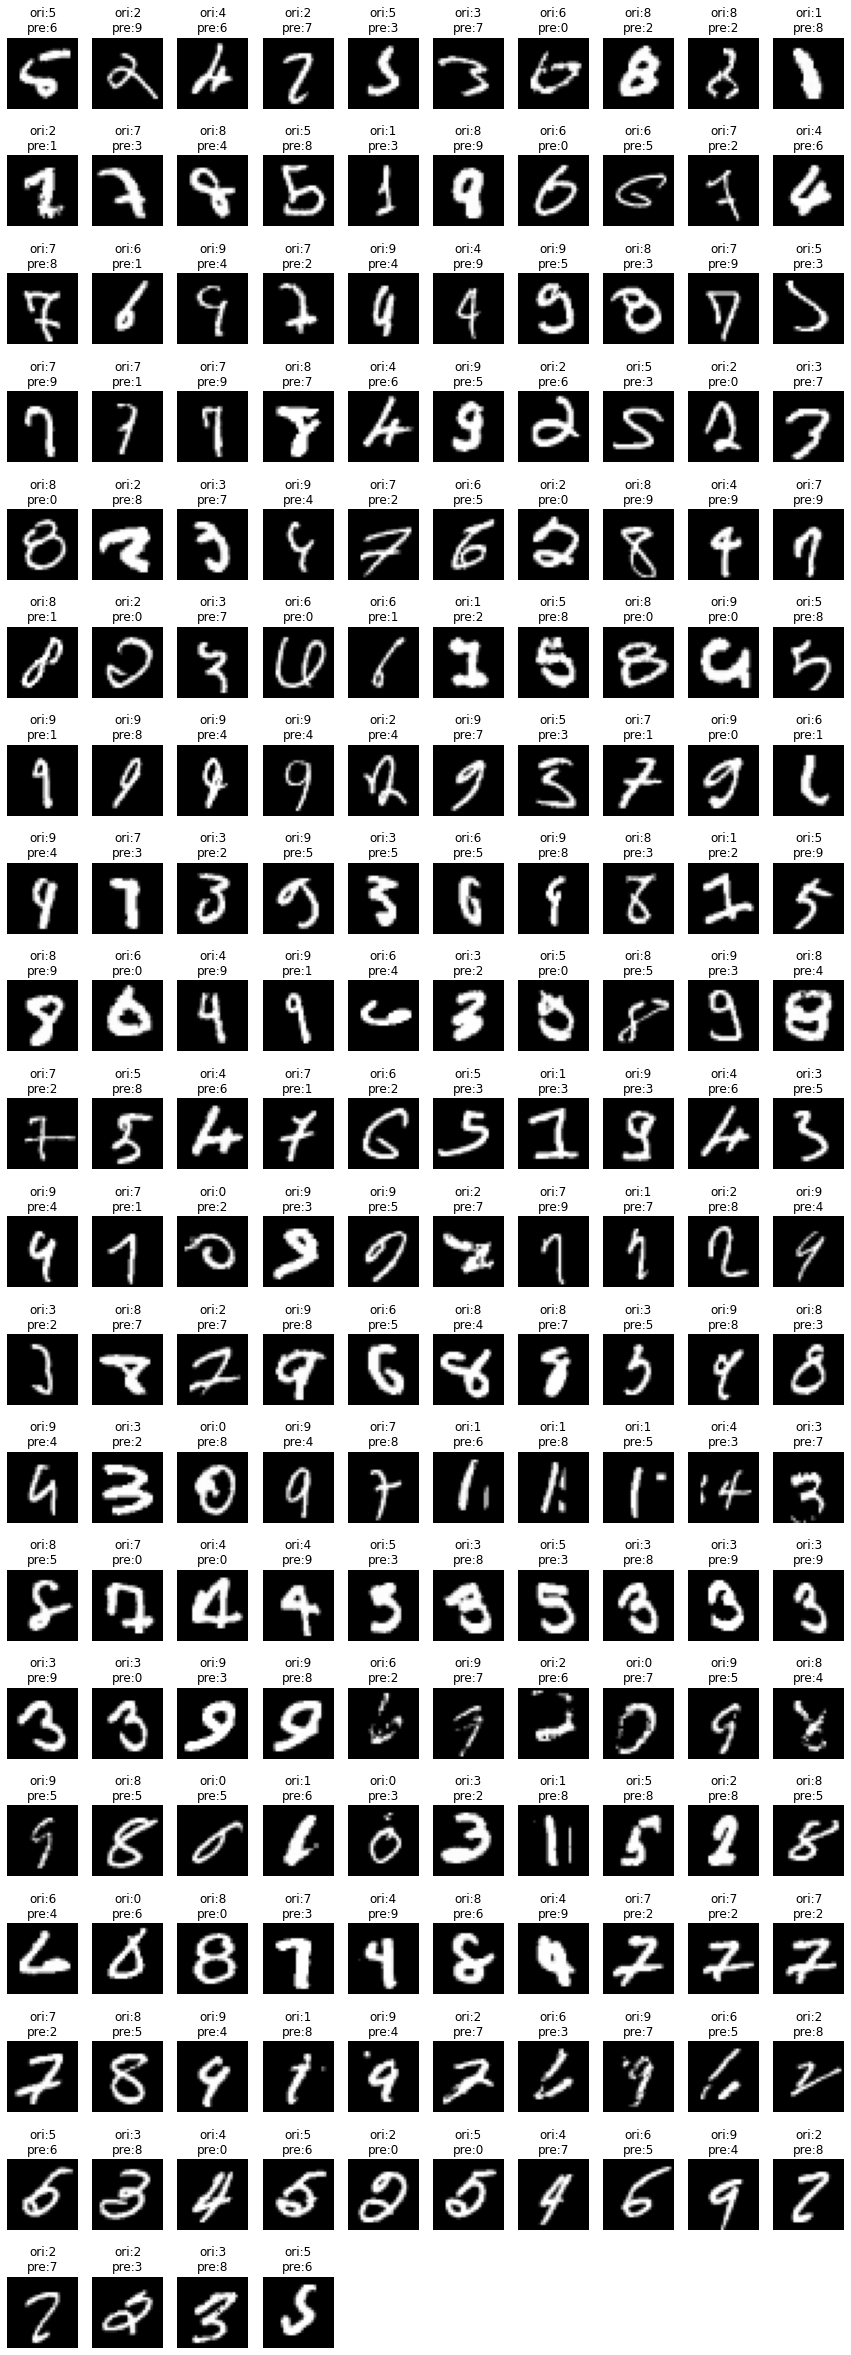

In [25]:
# 畫圖了解那些預測錯誤
import numpy as np
idx = np.nonzero(pre != y_test)[0]
false_img = x_test[idx]
false_ans = y_test[idx]
false_pre = pre[idx]
# 設定圖長寬尺寸
plt.figure(figsize=(15, 43))
width = 10
height = len(false_img) // width + 1
for i, m in enumerate(false_img):
  plt.subplot(height, width, i+1)
  plt.axis("off")
  t = "ori:{}\npre:{}".format(false_ans[i], false_pre[i])
  plt.title(t)
  plt.imshow(m, cmap="gray")  